# 모델평가

In [27]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier


from sklearn.metrics import f1_score, roc_curve, auc
import matplotlib.pyplot as plt



In [4]:
df_raw=pd.read_csv('/home/pirl/test/4 weeks/HMEQ.csv')

In [5]:
df_raw.isnull().sum(axis=0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [6]:
df_raw['JOB'].fillna('Other', inplace=True)
df_raw.fillna(df_raw.mean(), inplace=True)

In [7]:
df_raw_dummy=pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [10]:
df_raw_y=df_raw_dummy['BAD']
df_raw_x=df_raw_dummy.drop('BAD', axis=1, inplace=False)
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)
print("train data X size:{}".format(df_train_x.shape))
print("train data Y size:{}".format(df_train_y.shape))
print("test data X size:{}".format(df_test_x.shape))
print("test data X size:{}".format(df_test_y.shape))

train data X size:(2623, 18)
train data Y size:(2623,)
test data X size:(1125, 18)
test data X size:(1125,)


In [11]:
model=['DecisionTree','RandomForest','GradientBoosting','NeuralNet']

train_accuracy=[]; test_accuracy=[]
model_f1_score=[]
model_auc=[]

# 의사결정나무

In [13]:
dt_model=DecisionTreeClassifier(max_depth=4, min_samples_leaf=30)
dt_model.fit(df_train_x,df_train_y)

train_accuracy.append(dt_model.score(df_train_x,df_train_y))
test_accuracy.append(dt_model.score(df_test_x,df_test_y))

y_pred=dt_model.predict(df_test_x)

fpr,tpr,thresholds=roc_curve(df_test_y,y_pred)
roc_auc=auc(fpr,tpr)

model_auc.append(roc_auc)

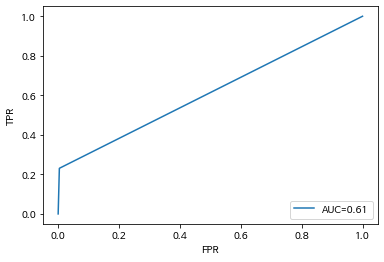

In [16]:
plt.plot(fpr,tpr,label='AUC=%0.2f' %roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR'); plt.xlabel('FPR')
plt.show()

In [18]:
model_f1_score.append(f1_score(df_test_y,y_pred))

In [19]:
rf_model=RandomForestClassifier(min_samples_leaf=20,max_depth=4, n_estimators=100,random_state=1234)
rf_model.fit(df_train_x,df_train_y)

train_accuracy.append(rf_model.score(df_train_x,df_train_y))
test_accuracy.append(rf_model.score(df_test_x,df_test_y))

y_pred=rf_model.predict(df_test_x)

fpr,tpr,thresholds=roc_curve(df_test_y,y_pred)
roc_auc=auc(fpr,tpr)

model_auc.append(roc_auc)

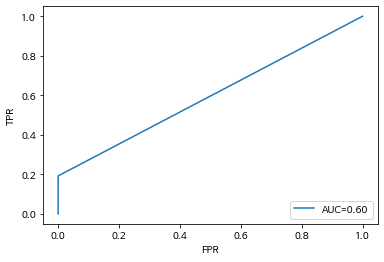

In [20]:
plt.plot(fpr,tpr,label='AUC=%0.2f' %roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR'); plt.xlabel('FPR')
plt.show()

In [21]:
model_f1_score.append(f1_score(df_test_y,y_pred))

In [22]:
gb_model=GradientBoostingClassifier(min_samples_leaf=10, max_depth=4, n_estimators=100,learning_rate=0.1, random_state=1234)
gb_model.fit(df_train_x,df_train_y)

train_accuracy.append(gb_model.score(df_train_x,df_train_y))
test_accuracy.append(gb_model.score(df_test_x,df_test_y))

y_pred=gb_model.predict(df_test_x)

fpr,tpr,thresholds=roc_curve(df_test_y,y_pred)
roc_auc=auc(fpr,tpr)

model_auc.append(roc_auc)

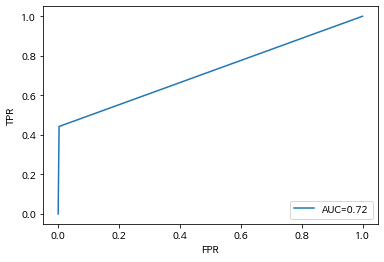

In [23]:
plt.plot(fpr,tpr,label='AUC=%0.2f' %roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR'); plt.xlabel('FPR')
plt.show()

In [24]:
model_f1_score.append(f1_score(df_test_y,y_pred))

In [28]:
v_feature_names=df_train_x.columns

scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_raw_x)
df_scaled=pd.DataFrame(df_scaled,columns=v_feature_names)


In [29]:
df_scaled_train_x,df_scaled_test_x=train_test_split(df_scaled,test_size=0.3, random_state=1234)
print('train data X size:{}'.format(df_scaled_train_x.shape))
print('test data X size:{}'.format(df_scaled_test_x.shape))

train data X size:(2623, 18)
test data X size:(1125, 18)


In [35]:
nn_model=MLPClassifier(hidden_layer_sizes=(80,80), activation='relu', solver='adam', random_state=1234)
nn_model.fit(df_scaled_train_x,df_train_y)

train_accuracy.append(nn_model.score(df_scaled_train_x,df_train_y))
test_accuracy.append(nn_model.score(df_scaled_test_x,df_test_y))

y_pred=nn_model.predict(df_scaled_test_x)

fpr,tpr,thresholds=roc_curve(df_test_y, y_pred)
roc_auc=auc(fpr,tpr)

model_auc.append(roc_auc)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


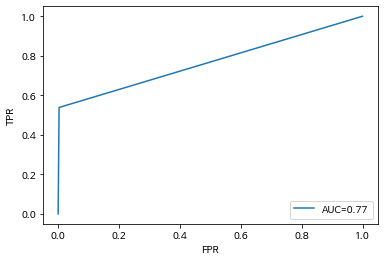

In [36]:
plt.plot(fpr,tpr,label='AUC=%0.2f' %roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR'); plt.xlabel('FPR')
plt.show()

In [37]:
model_f1_score.append(f1_score(df_test_y,y_pred))

# 모델 산출 및 평가

In [38]:
df_eval=pd.DataFrame(index=model)
df_eval['TrainAccuracy']=train_accuracy
df_eval['TestAccuracy']=test_accuracy
df_eval['F1Score']=model_f1_score
df_eval['AUC']=model_auc
df_eval.round(3)

,TrainAccuracy,TestAccuracy,F1Score,AUC
DecisionTree,0.930,0.925,0.364,0.613
RandomForest,0.927,0.925,0.323,0.596
GradientBoosting,0.977,0.946,0.601,0.720
NeuralNet,1.000,0.955,0.687,0.768


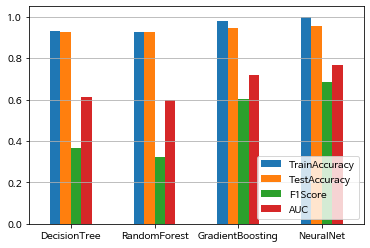

In [39]:
df_eval.plot.bar(rot=0)
plt.legend(loc='lower right')
plt.grid(axis='y')